# Logistic Regression
Using logistic regression we can predict a class using some features. In this project I used one feature which is `weight` to try to see if we can predict a class. The idea of this is to see of we can predict a class given some weight or if weight even has any correlation to the class. In this notebook I will show some of my steps that I did in this project and lastly evaluate my model.
### Table of Contents
- 1. Data Acquisition
- 2. Data cleaning
- 3. Data visualization
- 4. Modeling 
- 5. Model evaluation 

### Imports
These are just some basic imports, pandas for the data, and sklearn for the model and model evaluation, as well as matplotlib for visualisation

In [2]:
import numpy as np 
import math
import pandas as pd 

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


## 1. Data aquasition
I have the data in a csv file that I downloaded previously from kaggle which you can get <a href="https://www.kaggle.com/mustafaali96/weight-height">here.</a> 

In [3]:
data = pd.read_csv("../knn/train", names=["gender", "height", "weight"])

In [4]:
data

,gender,height,weight
5640,Female,66.766157,152.944405
8220,Female,63.881197,137.170886
2415,Male,68.720243,182.455923
7442,Female,62.834020,132.169244
3182,Male,70.962617,195.017206
...,...,...,...
2866,Male,68.932069,187.626609
4579,Male,64.746174,176.948433
4056,Male,69.741240,206.636440
7843,Female,62.536789,128.357712


These two varaibles i'll use for graph to show the relationship between the two. I also had to normalize the gender column so that I could predict something ()

In [5]:
x_1 = data['weight']
x_2 = data['height']

In [6]:
data = pd.get_dummies(data, columns=['gender'])

In [28]:
data

,height,weight,gender_Female,gender_Male,prediction,pred_class
5640,66.766157,152.944405,1,0,0.253184,0
8220,63.881197,137.170886,1,0,0.038634,0
2415,68.720243,182.455923,0,1,0.948248,1
7442,62.834020,132.169244,1,0,0.020027,0
3182,70.962617,195.017206,0,1,0.990111,1
...,...,...,...,...,...,...
2866,68.932069,187.626609,0,1,0.973589,1
4579,64.746174,176.948433,0,1,0.896930,1
4056,69.741240,206.636440,0,1,0.997928,1
7843,62.536789,128.357712,1,0,0.012060,0


### 3. Data Visualization
Here I graphed the data by `x` being weight and the `y` being height

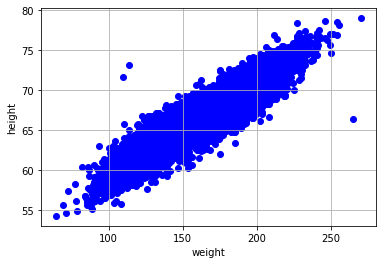

In [27]:
# plot the relationship between height and weight
%matplotlib inline 
plt.scatter(x_1, x_2, color='b')
plt.xlabel('weight')
plt.ylabel('height')
plt.grid(True)
plt.show();

Here I visualized it with a focus on where the values align on when we are between 0 and 1 (or beloning to a class or not)

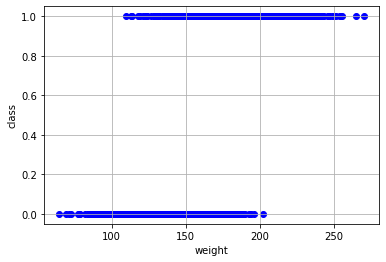

In [9]:
%matplotlib inline 
plt.scatter(x_1, data['gender_Male'], color='b')
plt.xlabel('weight')
plt.ylabel('class')
plt.grid(True)
plt.show();

In [10]:
# this is what we will be trying to predict
y = data['gender_Male']

### 4. Modeling
I used logistic regression as my model. Logistic regression is used for predicting the class of something as I explained earlier. I used `model.predict_proba()` because I wanted to get the probability of a weight beloning to a class, rather then using `model.predict()` which would give me the class it belongs to. The reason I wanted the probablities was so that I could later graph the curve of the function.

In [11]:
model = LogisticRegression()

In [12]:
x = x_1.values.reshape(-1,1)

In [13]:
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# get probablilites of of it belonging to a class
model.predict_proba(x)

array([[0.74681553, 0.25318447],
       [0.96136618, 0.03863382],
       [0.05175168, 0.94824832],
       ...,
       [0.00207176, 0.99792824],
       [0.98794014, 0.01205986],
       [0.9960676 , 0.0039324 ]])

In [15]:
# select the second column 
model.predict_proba(x)[:,1] 

array([0.25318447, 0.03863382, 0.94824832, ..., 0.99792824, 0.01205986,
       0.0039324 ])

In [16]:
# add probabilities to our dataframe
data["prediction"] = model.predict_proba(x)[:,1]

In [17]:
data

,height,weight,gender_Female,gender_Male,prediction
5640,66.766157,152.944405,1,0,0.253184
8220,63.881197,137.170886,1,0,0.038634
2415,68.720243,182.455923,0,1,0.948248
7442,62.834020,132.169244,1,0,0.020027
3182,70.962617,195.017206,0,1,0.990111
...,...,...,...,...,...
2866,68.932069,187.626609,0,1,0.973589
4579,64.746174,176.948433,0,1,0.896930
4056,69.741240,206.636440,0,1,0.997928
7843,62.536789,128.357712,1,0,0.012060


In [18]:
pred = data['prediction']

Here is where I use the probabilites that I got from `model.predict_proba()`. I can now graph each weight (x) and the probabilty (y). This will show us the graph of the function.

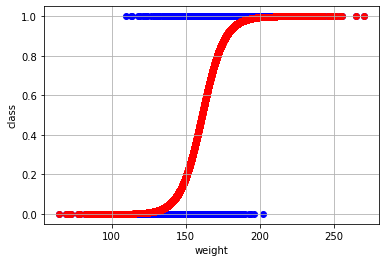

In [49]:
%matplotlib inline 
plt.scatter(x, y, color='b')
plt.scatter(x, pred, color='r')
plt.xlabel('weight')
plt.ylabel('class')
plt.grid(True)
plt.show();

In [20]:
model.predict_proba([[200]])

array([[0.00506632, 0.99493368]])

In [21]:
model.predict_proba([[130]])

array([[0.98498693, 0.01501307]])

### 5. Model evaluation
Here I evalute my model using a confusion matrix and a f1 score to check its a accuracy. The F1 score gets the accuracy by
<!-- - make a confusion matrix -->
<!-- - get the f score -->
<!-- - google other ways to evaluate binary logistic regression (use them as well) -->
<!-- - figure out how much each variable influences y -->

In [22]:
# imports to evalute the model
from sklearn.metrics import confusion_matrix, f1_score

In [23]:
data["pred_class"] = model.predict(x)
y_true = y
y_pred = data['pred_class']

In [24]:
# a confusion matrix
confusion_matrix(y_true, y_pred)

array([[3625,  378],
       [ 369, 3628]])

In [25]:
# the fscore
f1_score(y_true, y_pred, average='weighted')

0.9066249606074163

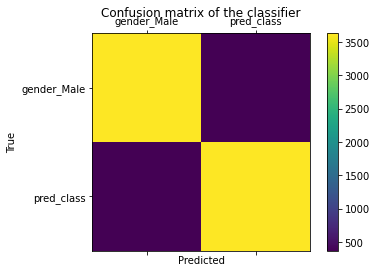

In [48]:
labels = ['gender_Male', 'pred_class']
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
# print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()